The code in this notebook was inspired and partially copied/derived from these articles:

https://towardsdatascience.com/lime-vs-shap-which-is-better-for-explaining-machine-learning-models-d68d8290bb16

LIME vs. SHAP: Which is Better for Explaining Machine Learning Models?
Two of the most popular Explainers compared
Dario Radečić, Dec 14, 2020

https://towardsdatascience.com/squeezing-more-out-of-lime-with-python-28f46f74ca8e
Squeezing More out of LIME with Python
How to create global aggregations of LIME weights
Conor O'Sullivan, May 4 2022

However many of the features do not work for MLP.

In [2]:
#download the optical recognition of handwritten digits
%pip install ucimlrepo 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
#from sklearn.datasets import load_wine
#Download wine dataset as a DataFrame
#raw_data = load_wine(as_frame=True)
#wine_data = raw_data.frame


#Remove target Variable
#wine_data['class']=wine_data['target'].map(lambda ind: raw_data['target_names'][ind])
#wine_data= wine_data.drop('target', axis=1)

#type(wine_data)
#print(wine_data.info())
#print(wine_data.describe())


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 

  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 
  
# metadata 
print(optical_recognition_of_handwritten_digits.metadata) 
  
# variable information 
print(optical_recognition_of_handwritten_digits.variables) 


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

In [5]:
#EDA - the data is split into two different dataframes. 
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0


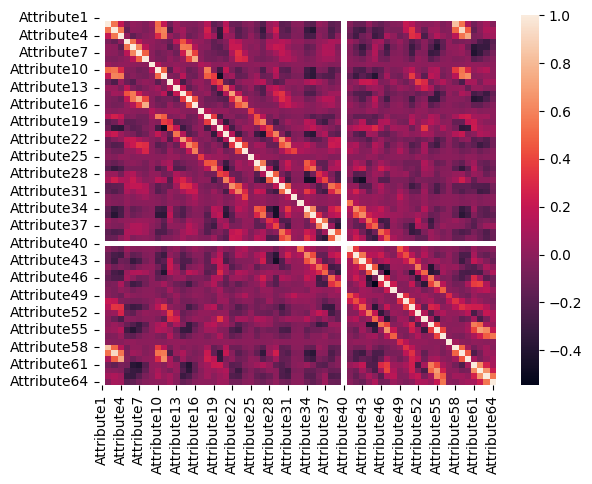

In [6]:
from sklearn.model_selection import train_test_split
#Ste up input variables(X) and output variable(y)
X = X
y = y
import seaborn as sns
#We examine correlated input variables to see if we should drop any
cormat = X.corr()
round(cormat,2)
#print(cormat);
sns.heatmap(cormat);
#total_phenols and flavanoids are highly correlated (0.86)
#od280/od315_of_diluted_wines and flavanoids are highly correlated (0.78)
#if we were fitting a regression model we should likely drop flavanoids;
#but we will be fitting a neural network
#X.drop("flavanoids", axis=1, inplace=True)
#In this case you can see that the test accuracy if the model as well as
#the individual recall values for each variable will decrease if you drop flavanoids



In [7]:
#Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:

#Set the random number generation seed so that results can be duplicated
np.random.seed(12345)

#Fit a Neural Network model with the training data
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='relu', solver='adam', max_iter=20000)
mlp.fit(X_train.values,y_train)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=20000)

In [9]:
from sklearn.metrics import classification_report
#Provide quality of fit metrics with the test dataset
y_pred = mlp.predict(X_test)
target_names = set(y)
print(X_test.columns)
print(classification_report(y_test, y_pred, target_names=target_names))

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20', 'Attribute21', 'Attribute22',
       'Attribute23', 'Attribute24', 'Attribute25', 'Attribute26',
       'Attribute27', 'Attribute28', 'Attribute29', 'Attribute30',
       'Attribute31', 'Attribute32', 'Attribute33', 'Attribute34',
       'Attribute35', 'Attribute36', 'Attribute37', 'Attribute38',
       'Attribute39', 'Attribute40', 'Attribute41', 'Attribute42',
       'Attribute43', 'Attribute44', 'Attribute45', 'Attribute46',
       'Attribute47', 'Attribute48', 'Attribute49', 'Attribute50',
       'Attribute51', 'Attribute52', 'Attribute53', 'Attribute54',
       'Attribute55', 'Attribute56', 'Attribute57', 'Attribute58',
       'Attribute59', 'Attribute60', 'Att

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


ValueError: Number of classes, 10, does not match size of target_names, 1. Try specifying the labels parameter

In [ ]:
%pip install lime
import lime
from lime import lime_tabular

#install Lime

test_1 = X_test.iloc[14]
print(test_1, y_pred[14])

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['class_0', 'class_1','class_2'],
    mode='classification'
)

#Explain one instance of the data with lime
lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=mlp.predict_proba
)
lime_exp.show_in_notebook(show_table=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=6d1144cf5840b2dd94d495c64dbd667a8073a2521059c4e98c2b81439626afbf
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
alcohol                           13.63
malic_acid                         1.81
ash                                2.70
alcalinity_of_ash                 17.20
magnesium                        112.00
total_phenols                      2.85
flavanoids                         2.91
nonflavanoid_phenols               0.30
proanthocyanins                    1.46
color_intensity                    7.30
hue                                1.28
od280/od315_of_diluted_wines       2.88
proline                         1310.00
Name: 15, dtype: float64 class_0


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
36


Text(0.5, 0, 'Mean |Weight|')

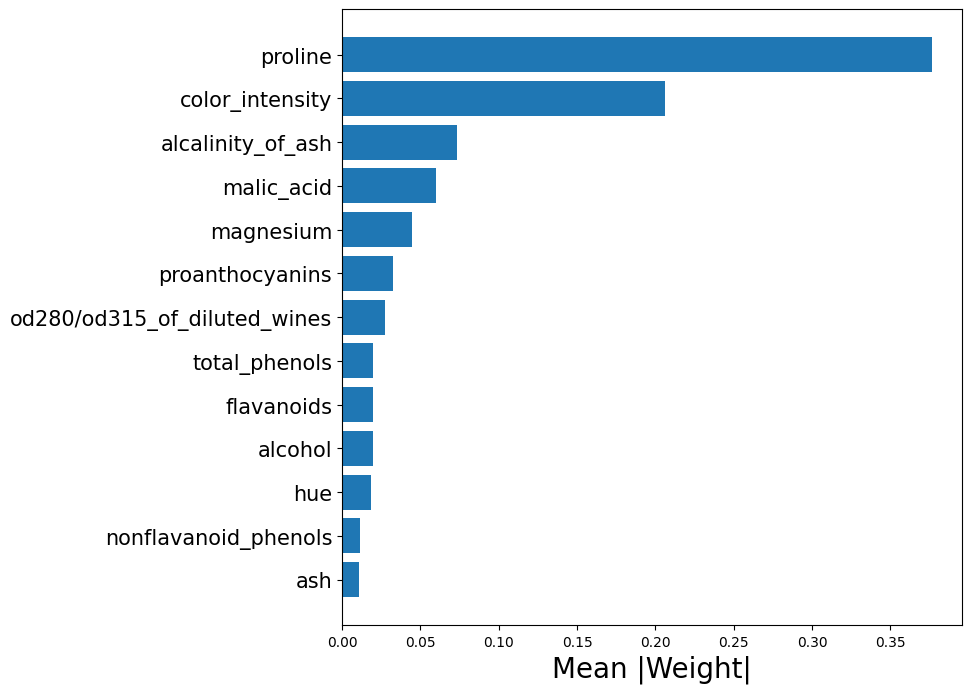

In [ ]:
import matplotlib.pyplot as plt

weights = []

#Function to get weights from LIME explanation object
def return_weights(ep):
    exp_list = exp.as_map()[1]
    exp_list = sorted(exp_list, key=lambda x: x[0])
    exp_weight = [x[1] for x in exp_list]
    return exp_weight

print(X_test.columns)
print(len(X_test))

#Iterate over the rows in feature matrix
#and collect the LIME weights
#You can run for more elements----but we pick a max of 25
for x in range(min(len(X_test),25)):
    #Get explanation
    exp = lime_explainer.explain_instance(X_test.iloc[x],
                                 mlp.predict_proba, num_features = len(X_test.columns))
    #Get weights
    exp_weight = return_weights(exp)
    weights.append(exp_weight)

#Create DataFrame of the LIME weights
lime_weights = pd.DataFrame(data=weights,columns=X_test.columns)

#Get absolute value of the mean of LIME weights
abs_mean = lime_weights.abs().mean(axis=0)
abs_mean = pd.DataFrame(data={'feature':abs_mean.index, 'abs_mean':abs_mean})
abs_mean = abs_mean.sort_values('abs_mean')

#Plot abs mean LIME weights
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

y_ticks = range(len(abs_mean))
y_labels = abs_mean.feature
plt.barh(y=y_ticks,width=abs_mean.abs_mean)

plt.yticks(ticks=y_ticks,labels=y_labels,size= 15)
plt.title('')
plt.ylabel('')
plt.xlabel('Mean |Weight|',size=20)

In [ ]:
%pip install shap
import shap
shap.initjs()
#Create a summary plot of the influence of all input variables on instance 15 of the test dataset
shap_explainer = shap.KernelExplainer(mlp.predict_proba, X_train)
shap_values = shap_explainer.shap_values(X_test.iloc[14,:])
shap.force_plot(shap_explainer.expected_value[0], shap_values[:, 0], X_test.iloc[14,:])


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


NameError: name 'mlp' is not defined

In [ ]:
shap.initjs()
shap_values = shap_explainer.shap_values(X_test)
#Now we show an interactive plot for all values/samples in the dataset
#to tie out before you need original sample ordering on the x axis and
#"f(x)" on the y-axis and look at x=14 and you will see proline of 325
shap.force_plot(shap_explainer.expected_value[0], shap_values[:, :, 0], X_test)

NameError: name 'shap' is not defined

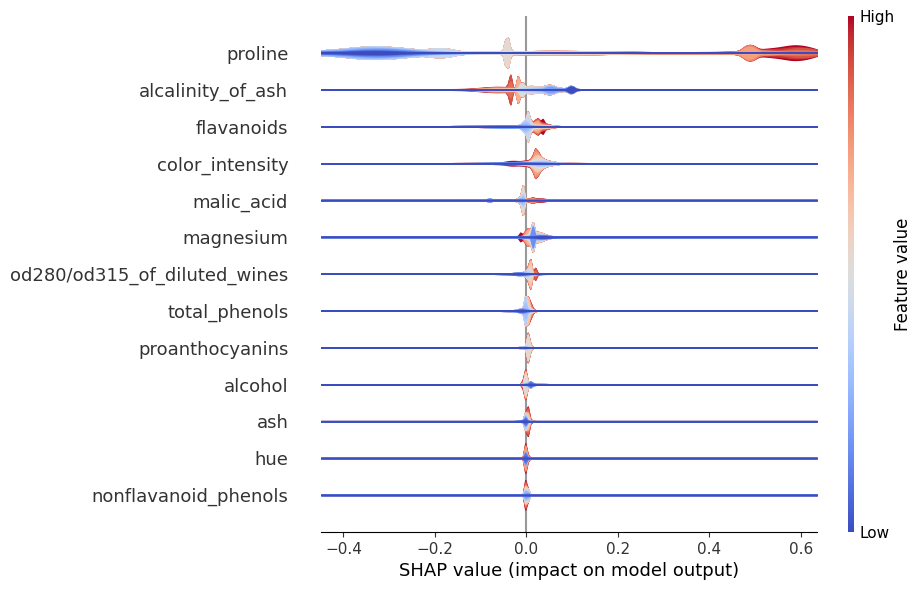

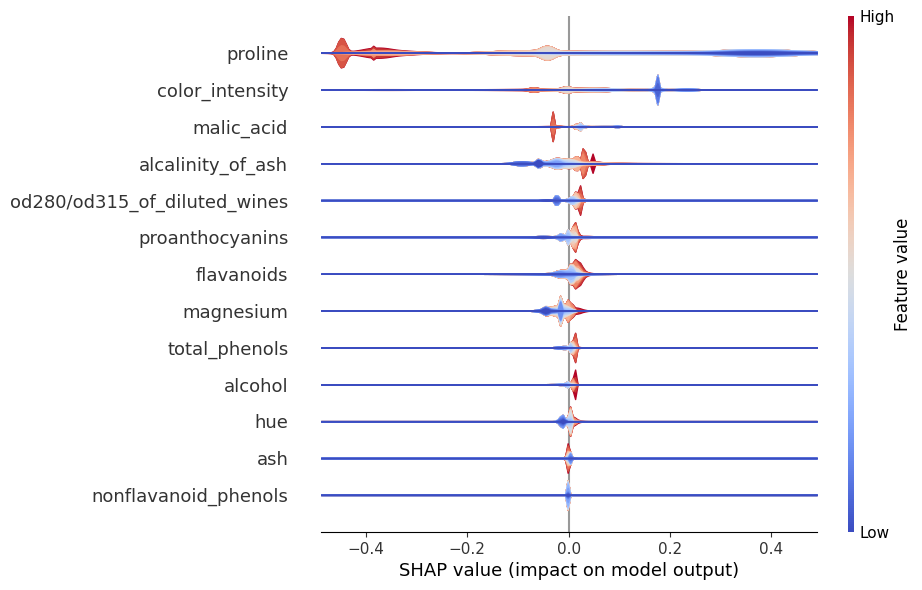

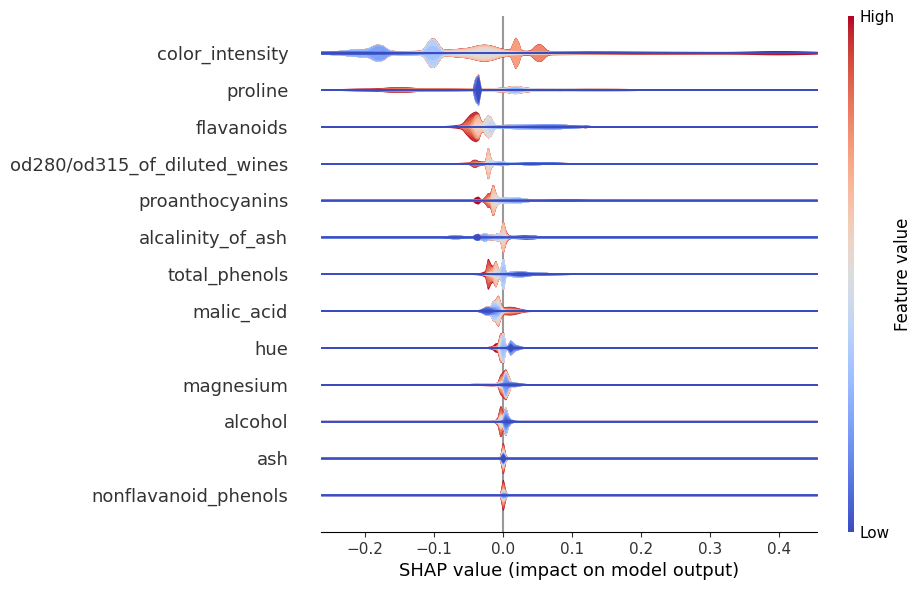

In [ ]:
import warnings
warnings.filterwarnings("ignore")

shap.initjs()
#Create a summary plot of the influence of all input variables on the test dataset
shap_explainer = shap.KernelExplainer(mlp.predict_proba, X_train)

shap_vals = shap_explainer.shap_values(X_test)

feat_names = list(X_test.columns)
shap.plots.violin(shap_vals[:,:,0], features=X_test, feature_names=feat_names, plot_type="layered_violin") # label: 0
shap.plots.violin(shap_vals[:,:,1], features=X_test, feature_names=feat_names, plot_type="layered_violin") # label: 1
shap.plots.violin(shap_vals[:,:,2], features=X_test, feature_names=feat_names, plot_type="layered_violin") # label: 2
